# Preparing data for ____

###### We are making a model to predict road accidents in NYC. 
To do this, we are going to use the following data 
- hourly traffic count on the bridges and tunnels of NYC 
- vehicle crashes in NYC 

We'll use the month, time of day and the vehicle count to predict how many accidents will happen at a future time and date for a given vehicle count.

We'll do this by... before you understand how we're doing this you must see-
### The datasets we are working with:

In [1]:
import pandas as pd

In [17]:
# hourly traffic raw data
dfHourlyTraffic = pd.read_csv('HourlyTraffic.csv')
dfHourlyTraffic.head(), dfHourlyTraffic.tail()

(   Plaza ID        Date  Hour Direction  # Vehicles - ETC (E-ZPass)  \
 0         1  11/28/2015     0         I                         477   
 1         1  11/28/2015     0         O                         486   
 2         1  11/28/2015     1         I                         350   
 3         1  11/28/2015     1         O                         307   
 4         1  11/28/2015     2         I                         280   
 
    # Vehicles - Cash/VToll  
 0                      205  
 1                      252  
 2                      171  
 3                      182  
 4                      133  ,
          Plaza ID        Date  Hour Direction  # Vehicles - ETC (E-ZPass)  \
 1362507        30  10/13/2018    19         O                        5052   
 1362508        30  10/13/2018    20         O                        4209   
 1362509        30  10/13/2018    21         O                        4129   
 1362510        30  10/13/2018    22         O                        398

In [16]:
# vehicle crash data
dfVehicleCrashes = pd.read_csv('VehicleCrashes.csv', low_memory=False)
dfVehicleCrashes.head(), dfVehicleCrashes.tail()

(         DATE  TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
 0  10/16/2018  0:00   BROOKLYN    11215  40.668990  -73.99641   
 1  10/16/2018  0:00  MANHATTAN    10039  40.824196  -73.94224   
 2  10/16/2018  0:00     QUEENS    11414  40.668860  -73.85491   
 3  10/16/2018  0:00        NaN      NaN  40.788692  -73.93787   
 4  10/16/2018  0:00        NaN      NaN  40.757668  -73.95915   
 
                  LOCATION                    ON STREET NAME CROSS STREET NAME  \
 0   (40.66899, -73.99641)  15 STREET                                 2 AVENUE   
 1  (40.824196, -73.94224)                               NaN               NaN   
 2   (40.66886, -73.85491)  80 STREET                               149 AVENUE   
 3  (40.788692, -73.93787)  EAST 106 STREET                                NaN   
 4  (40.757668, -73.95915)  FDR DRIVE                                      NaN   
 
                             OFF STREET NAME         ...          \
 0                                      

#### Modifying hourly traffic data to get Date-Hour-VehicleCount and Creating new df of 0 accidents

In [4]:
dfHourlyTraffic = dfHourlyTraffic[:35000]
dfHourlyTraffic['VehicleCount'] = dfHourlyTraffic['# Vehicles - ETC (E-ZPass)'] + dfHourlyTraffic['# Vehicles - Cash/VToll']
dfHourlyTraffic = dfHourlyTraffic.filter(items=['Date', 'Hour', 'VehicleCount'])
hourlyTrafficCount = dfHourlyTraffic.groupby(dfHourlyTraffic.index // 2).sum().VehicleCount
dfHourlyTraffic = dfHourlyTraffic[dfHourlyTraffic.index % 2 != 0].reset_index()
dfHourlyTraffic.VehicleCount = hourlyTrafficCount
dfHourlyTraffic = dfHourlyTraffic.filter(items=['Date', 'Hour', 'VehicleCount'])
dfHourlyTraffic.Date = pd.to_datetime(dfHourlyTraffic.Date)
dateCopy = dfHourlyTraffic.Date
dfHourlyTraffic['DateCopy'] = dateCopy
dfHourlyTraffic = dfHourlyTraffic.set_index('Date')
dfHourlyTraffic = dfHourlyTraffic[:'2014-01-24']

dfHourlyTrafficPartial = dfHourlyTraffic.filter(items = ['DateCopy', 'Hour'])
dfHourlyTrafficPartial['DateHourHash'] = dfHourlyTrafficPartial.apply(lambda row: str(row.DateCopy)[:10] + str(row.Hour), axis=1)
dfHourlyTraffic['DateHourHash'] = dfHourlyTrafficPartial['DateHourHash']
dfHourlyTraffic = dfHourlyTraffic.set_index('DateHourHash')
dfHourlyTraffic

,Hour,VehicleCount,DateCopy
DateHourHash,,,
2015-11-280,0,1420,2015-11-28
2015-11-281,1,1010,2015-11-28
2015-11-282,2,805,2015-11-28
2015-11-283,3,890,2015-11-28
2015-11-284,4,1234,2015-11-28
2015-11-285,5,1306,2015-11-28
2015-11-286,6,1866,2015-11-28
2015-11-287,7,2356,2015-11-28
2015-11-288,8,2787,2015-11-28


In [5]:
newZeroAccidentDf = dfHourlyTraffic
newZeroAccidentDf['AccidentCount'] = 0
newZeroAccidentDf = newZeroAccidentDf.AccidentCount
newZeroAccidentDf

DateHourHash
2015-11-280     0
2015-11-281     0
2015-11-282     0
2015-11-283     0
2015-11-284     0
2015-11-285     0
2015-11-286     0
2015-11-287     0
2015-11-288     0
2015-11-289     0
2015-11-2810    0
2015-11-2811    0
2015-11-2812    0
2015-11-2813    0
2015-11-2814    0
2015-11-2815    0
2015-11-2816    0
2015-11-2817    0
2015-11-2818    0
2015-11-2819    0
2015-11-2820    0
2015-11-2821    0
2015-11-2822    0
2015-11-2823    0
2015-11-270     0
2015-11-271     0
2015-11-272     0
2015-11-273     0
2015-11-274     0
2015-11-275     0
               ..
2014-01-2518    0
2014-01-2519    0
2014-01-2520    0
2014-01-2521    0
2014-01-2522    0
2014-01-2523    0
2014-01-240     0
2014-01-241     0
2014-01-242     0
2014-01-243     0
2014-01-244     0
2014-01-245     0
2014-01-246     0
2014-01-247     0
2014-01-248     0
2014-01-249     0
2014-01-2410    0
2014-01-2411    0
2014-01-2412    0
2014-01-2413    0
2014-01-2414    0
2014-01-2415    0
2014-01-2416    0
2014-01-2417   

#### Getting processed AccidentCountData to update accident counts and merge them with dfHourlyTraffic

In [6]:
dfAccidentCounts = pd.read_csv('AccidentCountsProcessed.csv')
dfAccidentCounts.head()

,Unnamed: 0,date,hour,accidents
0,0,12/31/15,0,17
1,1,12/30/15,6,1
2,2,12/31/15,0,13
3,3,12/31/15,10,20
4,4,12/31/15,11,21


In [7]:
dfAccidentCounts = pd.read_csv('AccidentCountsProcessed.csv')
#dfAccidentCounts.head()

dfAccidentCounts.date = pd.to_datetime(dfAccidentCounts.date)
dfAccidentCounts['DateHourHash'] = dfAccidentCounts.apply(lambda row: str(row.date)[:10] + str(row.hour), axis=1)
#dfAccidentCounts = dfAccidentCounts.set_index('date')
#dfAccidentCounts = dfAccidentCounts['2015-12-31']
#dfAccidentCounts
#dfAccidentCounts = dfAccidentCounts.set_index('DateHourHash')
#dfAccidentCounts = dfAccidentCounts.accidents
#dfAccidentCounts
dfAccidentCounts
#df.loc[df.Name.isin(df1.Name), ['Nonprofit', 'Education']] = df1[['Nonprofit', 'Education']]
newZeroAccidentDf = newZeroAccidentDf.reset_index()
newZeroAccidentDf.loc[newZeroAccidentDf.DateHourHash.isin(dfAccidentCounts.DateHourHash),['AccidentCount']] = dfAccidentCounts['accidents']
correctAccidentCount = newZeroAccidentDf.filter(items = ['DateHourHash', 'AccidentCount'])
correctAccidentCount = correctAccidentCount.set_index('DateHourHash')
correctAccidentCount
finalDf = pd.concat([correctAccidentCount, dfHourlyTraffic], axis=1)
finalDf = finalDf[['DateCopy', 'Hour', 'VehicleCount', 'AccidentCount']]
#getting rid of duplicate AccidentCount column of count 0's
finalDf = finalDf.iloc[:,:4]
finalDf['Month'] = finalDf.apply(lambda row: str(row.DateCopy)[5:7], axis=1)
finalDf.to_csv('datasetForML.csv')
finalDf

,DateCopy,Hour,VehicleCount,AccidentCount,Month
DateHourHash,,,,,
2015-11-280,2015-11-28,0,1420,17,11
2015-11-281,2015-11-28,1,1010,1,11
2015-11-282,2015-11-28,2,805,13,11
2015-11-283,2015-11-28,3,890,20,11
2015-11-284,2015-11-28,4,1234,21,11
2015-11-285,2015-11-28,5,1306,30,11
2015-11-286,2015-11-28,6,1866,32,11
2015-11-287,2015-11-28,7,2356,1,11
2015-11-288,2015-11-28,8,2787,37,11


### Plots

In [19]:
%matplotlib inline
start_date, end_date = '2014-06-01', '2015-05-31'
mask = (finalDf['DateCopy'] >= start_date) & (finalDf['DateCopy'] <= end_date)
df12MonthsHourlyAccidentsAndTrafficData = finalDf.loc[mask]
df12MonthsHourlyAccidentsAndTrafficData.head(), df12MonthsHourlyAccidentsAndTrafficData.tail()

(               DateCopy  Hour  VehicleCount  AccidentCount Month
 DateHourHash                                                    
 2015-05-310  2015-05-31     0          2944             33    05
 2015-05-311  2015-05-31     1          1861              2    05
 2015-05-312  2015-05-31     2          1359              1    05
 2015-05-313  2015-05-31     3          1215             40    05
 2015-05-314  2015-05-31     4          1266             21    05,
                DateCopy  Hour  VehicleCount  AccidentCount Month
 DateHourHash                                                    
 2014-06-0119 2014-06-01    19          5032             38    06
 2014-06-0120 2014-06-01    20          4524             30    06
 2014-06-0121 2014-06-01    21          4148              1    06
 2014-06-0122 2014-06-01    22          3619             12    06
 2014-06-0123 2014-06-01    23          2867             10    06)

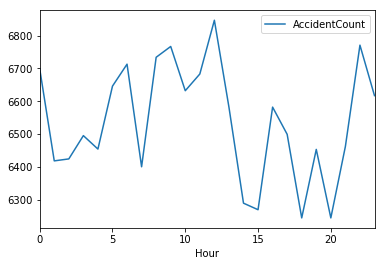

In [24]:
df = df12MonthsHourlyAccidentsAndTrafficData.set_index('Hour')
df = df.groupby(df.index)[['AccidentCount']].sum()
df.plot.line()

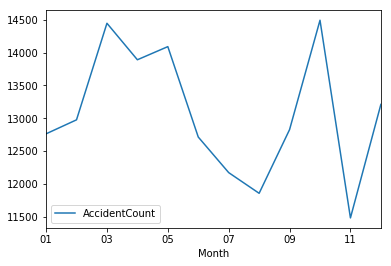

In [25]:
df = df12MonthsHourlyAccidentsAndTrafficData.set_index('Month')
df = df.groupby(df.index)[['AccidentCount']].sum()
df.plot.line()

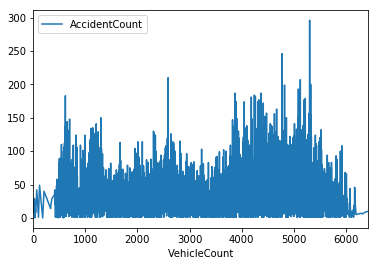

In [26]:
df = df12MonthsHourlyAccidentsAndTrafficData.set_index('VehicleCount')
df = df.groupby(df.index)[['AccidentCount']].sum()
df.plot.line()